# Sandbox Lab
## PH 211 COCC
### Bruce Emerson 2/11/2020

This notebook is meant to provide tools and discussion to support data analysis and presentation as you generate your lab reports. 

[Sandbox Lab](http://coccweb.cocc.edu/bemerson/PhysicsGlobal/Courses/PH211/PH211Materials/PH211Labs/PH211Labsandbox.html) and [Sandbox Lab Discussion](http://coccweb.cocc.edu/bemerson/PhysicsGlobal/Courses/PH211/PH211Materials/PH211Labs/PH211LabDsandbox.html)

In this lab we are using kinematics and plots to predict the two dimensional motion of an object flying through the air here on earth. The object will be going slow enough that we expect that airdrag is minimal but our data may suggest otherwise.

A new feature in this lab is that the formulae that I plot in the sample lab will/may be erroneous in some way that you will need to fix for the lab. Some other portions of the lab write up will be referred to only peripherally since you are quite capable of creating the requested dialog in the lab without my guidance.

For the formal lab report you will want to create your own description of what you understand the process and intended outcome of the lab is. 

## Dependencies

This is where we load in the various libraries of python tools that are needed for the particular work we are undertaking.  
  
```numpy``` is a numerical tools library - often imported as np. ```numpy``` also contains the statistical tools that we will use in this lab. There are other libraries dedicated to statistical tools but 'numpy' has everything we need.  
```matplotlib.pyplot``` is often imported as ```plt``` to make it easier to use. ```matplotlib``` has the plotting tools that we need for this lab. 


The following code cell will need to be run first before any other code cells.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial as ply

### The simple physics model...sort of...

Because a freebody diagram for a projectile has just one force (assuming no air drag), and that force is constant, Newton's 2nd Law affirms that the acceleration must also be constant. When the acceleration is constant we have a particular set of results from integrating the acceleration to get velocity and position described by the following equations:

For the horizontal direction:  

$$ x_f = x_0 + v_{0_x} \cdot \Delta t$$

For the vertical direction:  

$$ v_f = v_0 + a_y \cdot \Delta t$$

$$ y_f = y_0 + v_{0_y} \cdot \Delta t + \frac{1}{2} a_y \cdot \Delta t^2 $$

We need to know the intial postion of the projectile as well as the magnitude and direction of it's initial velocity to calculate it's path. Alternatively we can know something about where it lands and figure out how fast it was going.


### Your Calculations

Somewhere in here you are asked to show how you determine the velocity of your projectile from your data (how far it went off the counter). Do the algebra by hand and then show, **symbolically**, the equation you used to calculate the flight time and ultimately the velocity. This is partly to get you to figure out how to do the symbolic algebra instead of the numbers and partly to make you practice using LaTeX (markdown) to display equations.

$$ fancy equation stuff with cool_{subscripts} and \frac{something}{something else}$$



In [50]:
# initial conditions
initialvelocity = 4.
initialy = 1.01 # initial height in m
initialx = 0. # initial horizontal location
launch_angle_deg = 25.
anglerad = launch_angle_deg*np.pi/180.
velinitialy = initialvelocity*np.sin(anglerad)
velinitialx = initialvelocity*np.cos(anglerad)
velocity_variability = 0.04 # percentage variability in velocity
angular_uncertainty = 0.02 # launch angle uncertainty in radians

# variability plots
velhighy =  initialvelocity*(1.+ velocity_variability)*np.sin(anglerad+angular_uncertainty)
velhighx =  initialvelocity*(1.+ velocity_variability)*np.cos(anglerad+angular_uncertainty)

# useful constants
gravity_moon = 1.62
gravity_earth = 9.81
accely = - gravity_earth

# anglerad

### Commentary

I have intentionally implemented the plotting part of this notebook incorrectly. I want to see you modify the code to accurately reflect the equations describing projectile motion. In addition I have only implemented the high side of the variability question leaving you to do the low side (lowest likely velocity and angle for your situation).

```modeltime = np.linspace(0.,maxtime,numpoints)```

Remember that the linear space created by this command covers some range of times that I want to consider. In order to calculate the x and y location of the projectile at a given time I need to cycle through a loop. This is what the 

```for i, time in enumerate(modeltime):```

does in the code. This takes each time (calls it time) in the list modeltime and keeps track of which entry in the list it is (i) and then calculates the x and y locations for the circumstances I want to calculate.

You will need to execute this code in different cells to generate the plots needed for distinct parts of this lab. Copy, paste, and modify is what I'm expecting. For those of you with more experience coding you will recognize the risk involved in keeping the same variable names when you copy and past. For those of you who are new to coding be aware that once I have allocated a name and told Python what the value of that variable is the kernal remembers it forever. This can lead to some irritating problems if you're not careful. Good coding practice is to change the names if you want to copy and reuse code to do the same task. When I tried to make multiple plots by simply copying and pasting it did work but part of me is still uncomfortable with it.

### Discuss your variability

Some place in here you'll want to present and discuss the variability in your data.

In [51]:
# generate x values for model of data
maxtime = .8
numpoints = 200
modeltime = np.linspace(0.,maxtime,numpoints)

# create model x andy position lists that matches the model time list
modely = np.full_like(modeltime,0)
modelx = np.full_like(modeltime,0)
highy = np.full_like(modeltime,0)
highx = np.full_like(modeltime,0)
    
for i, time in enumerate(modeltime):
    modely[i] = initialy**1.1 + velinitialy*time + 0.5*accely*time**2.2
    modelx[i] = initialx + velinitialx*time + time**.5
    highy[i] = initialy**1.1 + velhighy*time + 0.5*accely*time**2.2
    highx[i] = initialx + velhighx*time + time**.5

# print("testing the output of the loop;", modelheight)

### Plot Model 

Just like we've done previously with different labels etc etc

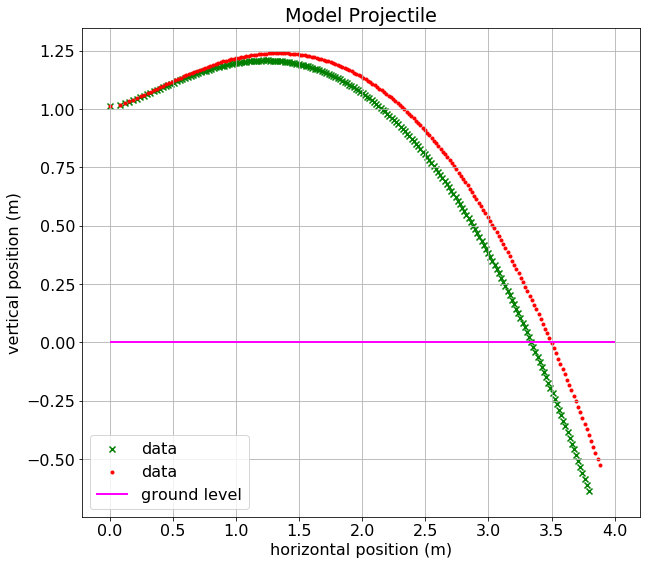

In [52]:
fig2, ax2 = plt.subplots()
ax2.scatter(modelx, modely,
            marker = 'x', color = 'green',
            label = "data")

ax2.scatter(highx, highy,
            marker = '.', color = 'red',
            label = "data")


unknown_data = 1.87
ax2.hlines(0, 0, 4,
         color = 'magenta', linestyle = '-',
         linewidth = 2., label = "ground level")

plt.rcParams.update({'font.size': 16}) # make labels easier to read
ax2.set(xlabel='horizontal position (m)', ylabel='vertical position (m)',
       title='Model Projectile')

fig2.set_size_inches(10, 9)
ax2.grid()

plt.legend(loc= 3)
plt.show()

### Discussion: 

What did you learn? Did your data/model make it seem likely that you would land the ball within 10 cm of the target? How is that indicated by your plots? Anything else a reasonable person would expect you to say?

## Reflection

As usual I learned a bunch of new stuff in the process of creating this notebook as a framework for your lab report. Thanks.